#**How to Train YOLOv12 Object Detection Model on a Custom Dataset**

In [ ]:
!nvidia-smi # Check if GPU is available and view GPU memory and status

Thu Feb 27 14:42:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package** 

In [ ]:
%pip install ultralytics # Step 01: Install the Ultralytics Package (YOLOv12 support)

Note: you may need to restart the kernel to use updated packages.


**Step 02 # Import All the Requried Libraries**

In [ ]:
# Step 02: Import Required Libraries
import ultralytics   # Ultralytics YOLO library
ultralytics.checks() # Check the environment setup

Ultralytics 8.3.111  Python-3.11.11 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13500)
Setup complete  (20 CPUs, 31.3 GB RAM, 360.4/476.3 GB disk)


In [ ]:
from ultralytics import YOLO # Import the YOLO class
from IPython.display import Image # For displaying images inside Jupyter

In [ ]:
HOME = os.getcwd() # Get current working directory
print(HOME) # Print working directory

c:\Users\Mon\Downloads\dataSci


**Step # 03 Download Dataset from Roboflow**

https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/2

In [ ]:
%pip install --user roboflow # Step 03: Download Dataset from Roboflow

  Using cached pillow_heif-0.22.0-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached pillow_heif-0.22.0-cp311-cp311-win_amd64.whl (8.6 MB)
Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import sys
print(sys.executable) # Print path to current Python executable (useful for checking installations)

c:\Users\Mon\Downloads\dataSci\.conda\python.exe


In [ ]:
!c:\Users\Mon\anaconda3\python.exe -m pip install roboflow

In [ ]:
from roboflow import Roboflow # Import Roboflow and download dataset
rf = Roboflow(api_key="lPk87P9rtrt5gbrVgdJK") # Authenticate with Roboflow API
project = rf.workspace("chinesegod").project("chinese-god")  # Load specific project
version = project.version(2) # Specify version
dataset = version.download("yolov12") # Download dataset in YOLOv12 format


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location} # List the contents of the dataset directory

'ls' is not recognized as an internal or external command,
operable program or batch file.


**Step # 04 Fine-tune YOLOv12 model on a Custom Dataset**

**NOTE:** We need to make a few changes to our downloaded dataset so it will work with YOLOv12. Run the following bash commands to prepare your dataset for training by updating the relative paths in the `data.yaml` file, ensuring it correctly points to the subdirectories for your dataset's `train`, `test`, and `valid` subsets.

In [ ]:
# Adjust dataset YAML file: Remove last 4 lines and replace with correct paths
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!cat {dataset.location}/data.yaml # Show updated data.yaml content

'cat' is not recognized as an internal or external command,
operable program or batch file.


We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 50 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [ ]:
model = YOLO("yolo12s.yaml") # Load YOLOv12 small configuration

In [ ]:
results = model.train(data=f'{dataset.location}/data.yaml', epochs=50)  # Train for 50 epochs

Ultralytics 8.3.111  Python-3.11.11 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13500)
engine\trainer: task=detect, mode=train, model=yolo12s.yaml, data=c:\Users\Mon\Downloads\dataSci\Chinese-God-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning C:\Users\Mon\Downloads\dataSci\Chinese-God-2\train\labels.cache... 2322 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2322/2322 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.0 ms, read: 264.857.6 MB/s, size: 45.0 KB)



val: Scanning C:\Users\Mon\Downloads\dataSci\Chinese-God-2\valid\labels.cache... 220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 220/220 [00:00<?, ?it/s]


Plotting labels to runs\detect\train7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      2.986      4.294      4.013          5        640: 100%|██████████| 146/146 [18:39<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:41<00:00,  5.93s/it]

                   all        220        220    0.00245      0.709    0.00858    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      2.405      3.518      3.033          3        640: 100%|██████████| 146/146 [18:46<00:00,  7.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:42<00:00,  6.02s/it]

                   all        220        220      0.865      0.137      0.158     0.0513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      2.111      2.931      2.589          3        640: 100%|██████████| 146/146 [18:39<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.72s/it]

                   all        220        220     0.0992      0.385      0.137     0.0538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G       1.95      2.652      2.418          6        640: 100%|██████████| 146/146 [21:22<00:00,  8.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.01s/it]

                   all        220        220      0.336      0.641      0.416      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.849      2.477       2.29          4        640: 100%|██████████| 146/146 [22:15<00:00,  9.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:45<00:00,  6.56s/it]

                   all        220        220      0.282      0.567      0.316      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.756      2.339      2.206          6        640: 100%|██████████| 146/146 [23:17<00:00,  9.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:48<00:00,  6.91s/it]

                   all        220        220      0.358      0.573      0.433      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.724      2.256      2.177          8        640: 100%|██████████| 146/146 [22:11<00:00,  9.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:45<00:00,  6.52s/it]

                   all        220        220      0.368      0.652      0.478      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.669      2.181      2.101          5        640: 100%|██████████| 146/146 [23:21<00:00,  9.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.07s/it]

                   all        220        220      0.339      0.707      0.486      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.642      2.089      2.073          4        640: 100%|██████████| 146/146 [23:17<00:00,  9.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:49<00:00,  7.03s/it]

                   all        220        220      0.457      0.698      0.576      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.614      2.075      2.068          2        640: 100%|██████████| 146/146 [22:20<00:00,  9.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.67s/it]

                   all        220        220      0.541       0.65      0.577      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.602      2.028      2.048          3        640: 100%|██████████| 146/146 [18:35<00:00,  7.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.73s/it]

                   all        220        220       0.47      0.666      0.599      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.571      1.964      2.022          6        640: 100%|██████████| 146/146 [18:38<00:00,  7.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.66s/it]

                   all        220        220      0.527      0.687      0.649      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.558      1.944      1.997          4        640: 100%|██████████| 146/146 [18:40<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.76s/it]

                   all        220        220      0.559      0.602      0.627      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.524      1.897       1.98          2        640: 100%|██████████| 146/146 [18:41<00:00,  7.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.68s/it]

                   all        220        220      0.541      0.658      0.687      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.525      1.852      1.971          5        640: 100%|██████████| 146/146 [18:34<00:00,  7.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.64s/it]

                   all        220        220      0.651      0.654      0.679      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.512      1.807      1.948          5        640: 100%|██████████| 146/146 [18:36<00:00,  7.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.59s/it]

                   all        220        220      0.695      0.673      0.731      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.502      1.795      1.947          4        640: 100%|██████████| 146/146 [18:40<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.65s/it]

                   all        220        220       0.67      0.674      0.712      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.471      1.744      1.902          5        640: 100%|██████████| 146/146 [18:37<00:00,  7.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.76s/it]

                   all        220        220      0.582      0.709      0.696      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.472      1.736      1.916          5        640: 100%|██████████| 146/146 [18:42<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.69s/it]

                   all        220        220      0.667       0.71      0.767       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.453      1.725      1.906          8        640: 100%|██████████| 146/146 [18:41<00:00,  7.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.75s/it]

                   all        220        220      0.729      0.616      0.724      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.436      1.695      1.882          2        640: 100%|██████████| 146/146 [18:42<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.72s/it]

                   all        220        220      0.704      0.699       0.77      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.435      1.669       1.88          3        640: 100%|██████████| 146/146 [18:40<00:00,  7.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.72s/it]

                   all        220        220      0.749      0.618      0.724      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.412      1.646      1.877          2        640: 100%|██████████| 146/146 [18:42<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.75s/it]

                   all        220        220      0.754      0.736      0.803      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.394      1.618      1.837          4        640: 100%|██████████| 146/146 [18:41<00:00,  7.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.64s/it]

                   all        220        220      0.684      0.673      0.758      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.397      1.606      1.844          4        640: 100%|██████████| 146/146 [18:35<00:00,  7.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.59s/it]

                   all        220        220      0.679      0.783        0.8      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.386      1.577      1.838          5        640: 100%|██████████| 146/146 [18:42<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.82s/it]

                   all        220        220      0.755      0.726      0.811      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.376      1.537       1.82          3        640: 100%|██████████| 146/146 [18:43<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.73s/it]

                   all        220        220      0.783      0.732      0.792      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G       1.36      1.544      1.813          5        640: 100%|██████████| 146/146 [18:43<00:00,  7.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.65s/it]

                   all        220        220      0.704      0.725      0.763      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.349      1.524      1.812          3        640: 100%|██████████| 146/146 [18:37<00:00,  7.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.59s/it]

                   all        220        220      0.812      0.718      0.821      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.354      1.503      1.806          3        640: 100%|██████████| 146/146 [18:39<00:00,  7.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.66s/it]

                   all        220        220      0.729      0.716      0.803      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.342      1.469      1.795          8        640: 100%|██████████| 146/146 [19:02<00:00,  7.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.77s/it]

                   all        220        220      0.796      0.744      0.846      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.319      1.467      1.777          5        640: 100%|██████████| 146/146 [18:53<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.73s/it]

                   all        220        220      0.797      0.713      0.805      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.319      1.454      1.772          6        640: 100%|██████████| 146/146 [18:51<00:00,  7.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.74s/it]

                   all        220        220       0.79      0.762      0.811       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.315      1.431      1.774          4        640: 100%|██████████| 146/146 [18:54<00:00,  7.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:41<00:00,  5.87s/it]

                   all        220        220       0.79      0.754      0.818      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.307      1.432      1.762          5        640: 100%|██████████| 146/146 [18:55<00:00,  7.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.83s/it]

                   all        220        220      0.812      0.721      0.794       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.302      1.403      1.751          3        640: 100%|██████████| 146/146 [18:52<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:41<00:00,  5.91s/it]

                   all        220        220      0.742      0.763      0.822      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      1.298       1.37       1.75          8        640: 100%|██████████| 146/146 [18:52<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.69s/it]

                   all        220        220       0.75      0.761      0.818      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.282      1.362      1.745          2        640: 100%|██████████| 146/146 [18:51<00:00,  7.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.69s/it]

                   all        220        220      0.824      0.773      0.832      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.264      1.373      1.729          3        640: 100%|██████████| 146/146 [18:56<00:00,  7.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.70s/it]

                   all        220        220      0.812      0.772      0.855      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.279      1.363      1.744          6        640: 100%|██████████| 146/146 [18:52<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.81s/it]

                   all        220        220      0.799      0.779      0.848       0.48


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.225      1.044      1.854          2        640: 100%|██████████| 146/146 [18:52<00:00,  7.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.69s/it]

                   all        220        220      0.834        0.8      0.864      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.174     0.9657      1.789          2        640: 100%|██████████| 146/146 [18:48<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.70s/it]

                   all        220        220      0.824      0.798      0.872      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.157     0.9315      1.782          2        640: 100%|██████████| 146/146 [18:49<00:00,  7.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.67s/it]

                   all        220        220      0.906      0.752      0.878       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.137     0.9024      1.763          2        640: 100%|██████████| 146/146 [18:48<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.63s/it]

                   all        220        220      0.858      0.807      0.879      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.128     0.8902      1.753          2        640: 100%|██████████| 146/146 [18:47<00:00,  7.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.64s/it]

                   all        220        220      0.817      0.821      0.876      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.117     0.8719      1.743          2        640: 100%|██████████| 146/146 [18:45<00:00,  7.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.70s/it]

                   all        220        220      0.869      0.805      0.885      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.112     0.8679      1.739          2        640: 100%|██████████| 146/146 [18:48<00:00,  7.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.74s/it]

                   all        220        220      0.906      0.787       0.89      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.085     0.8457      1.715          2        640: 100%|██████████| 146/146 [18:47<00:00,  7.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.78s/it]

                   all        220        220      0.872      0.855      0.907      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.078     0.8326      1.701          2        640: 100%|██████████| 146/146 [18:55<00:00,  7.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:39<00:00,  5.68s/it]

                   all        220        220      0.822       0.87      0.908      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.064     0.8248      1.691          2        640: 100%|██████████| 146/146 [18:45<00:00,  7.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:40<00:00,  5.72s/it]

                   all        220        220      0.844      0.865      0.905      0.533



50 epochs completed in 16.653 hours.
Optimizer stripped from runs\detect\train7\weights\last.pt, 18.9MB
Optimizer stripped from runs\detect\train7\weights\best.pt, 18.9MB

Validating runs\detect\train7\weights\best.pt...
Ultralytics 8.3.111  Python-3.11.11 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13500)
YOLO12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:36<00:00,  5.16s/it]


                   all        220        220      0.822       0.87      0.908      0.539
              Cai shen         41         41       0.86      0.897      0.946      0.704
              Guan Yin         47         47      0.847       0.83      0.877       0.47
               Guan Yu         47         47      0.752      0.711      0.783      0.379
        Smiling Buddha         50         50      0.871      0.942      0.958      0.492
               Xuan wu         35         35      0.782      0.971      0.975      0.649
Speed: 1.2ms preprocess, 157.0ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train7


**Step # 05 Evaluate fine-tuned YOLOv12 model**


In [ ]:
# Fix locale encoding issue sometimes found in Windows
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train7/ # List training results folder

'ls' is not recognized as an internal or external command,
operable program or batch file.


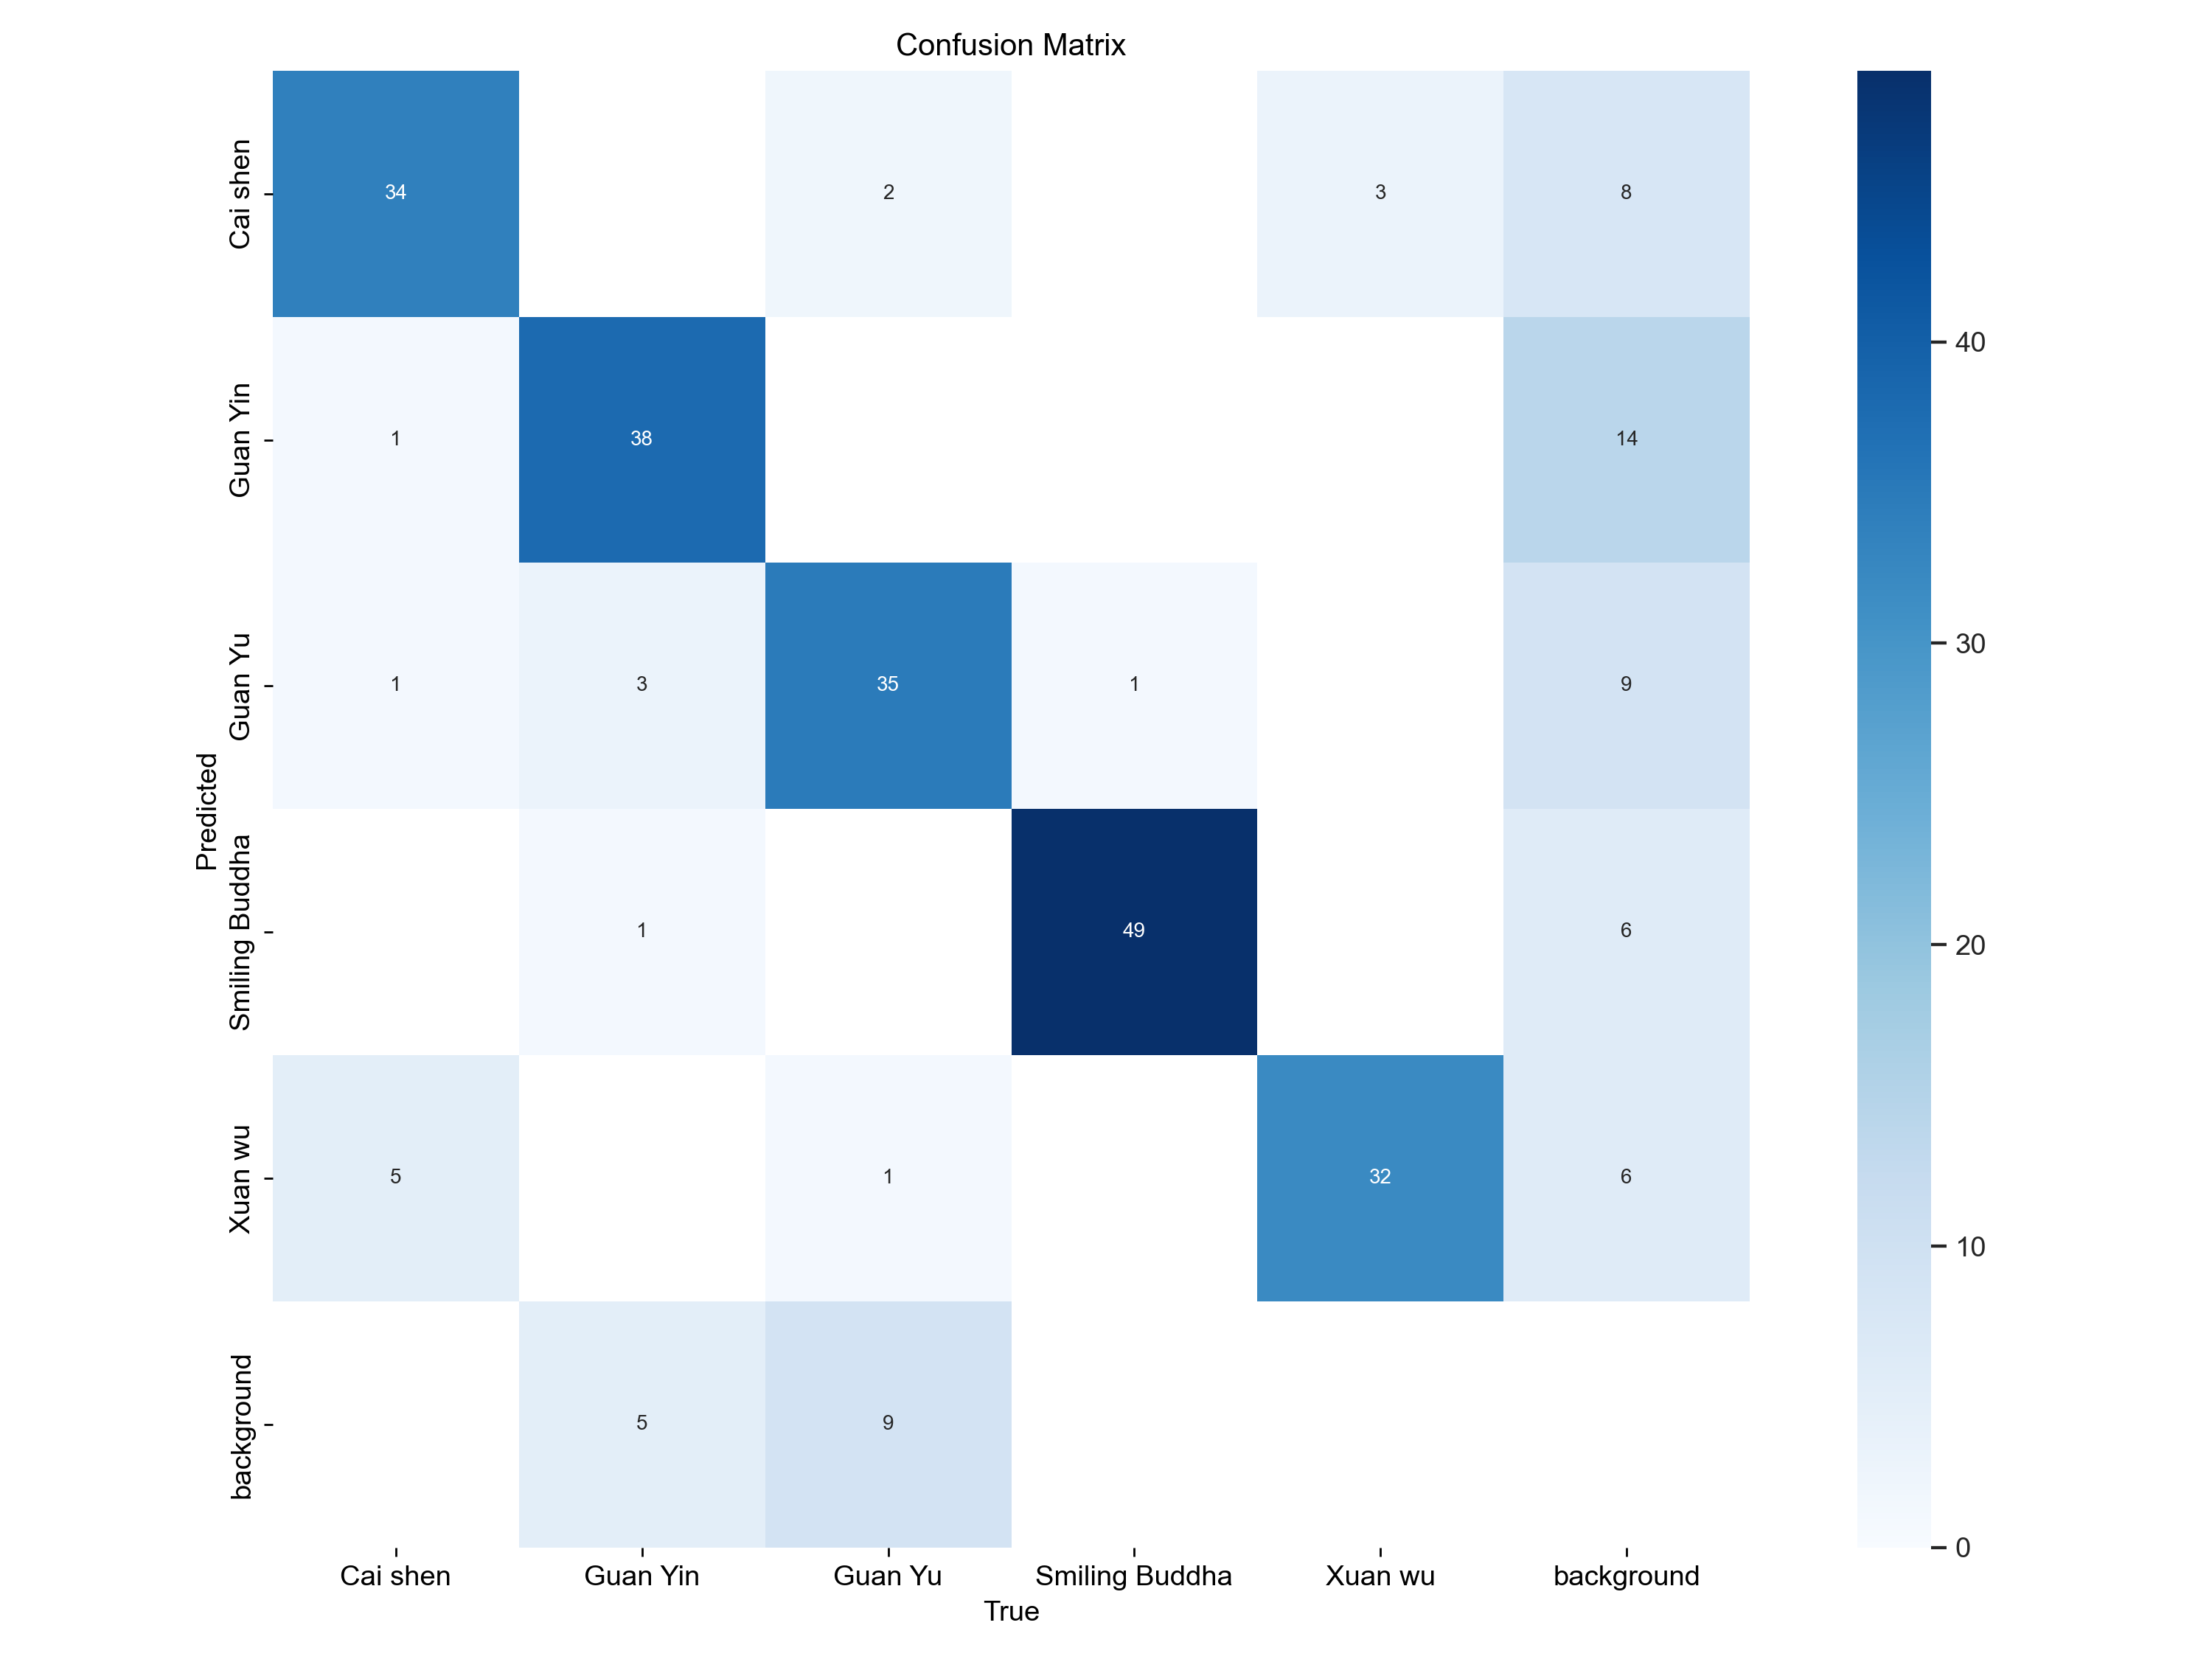

In [ ]:

# Precision: True Positive / (True Positive + False Positive)
# Higher precision means fewer false positives.
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=1000) # Display evaluation images and plots

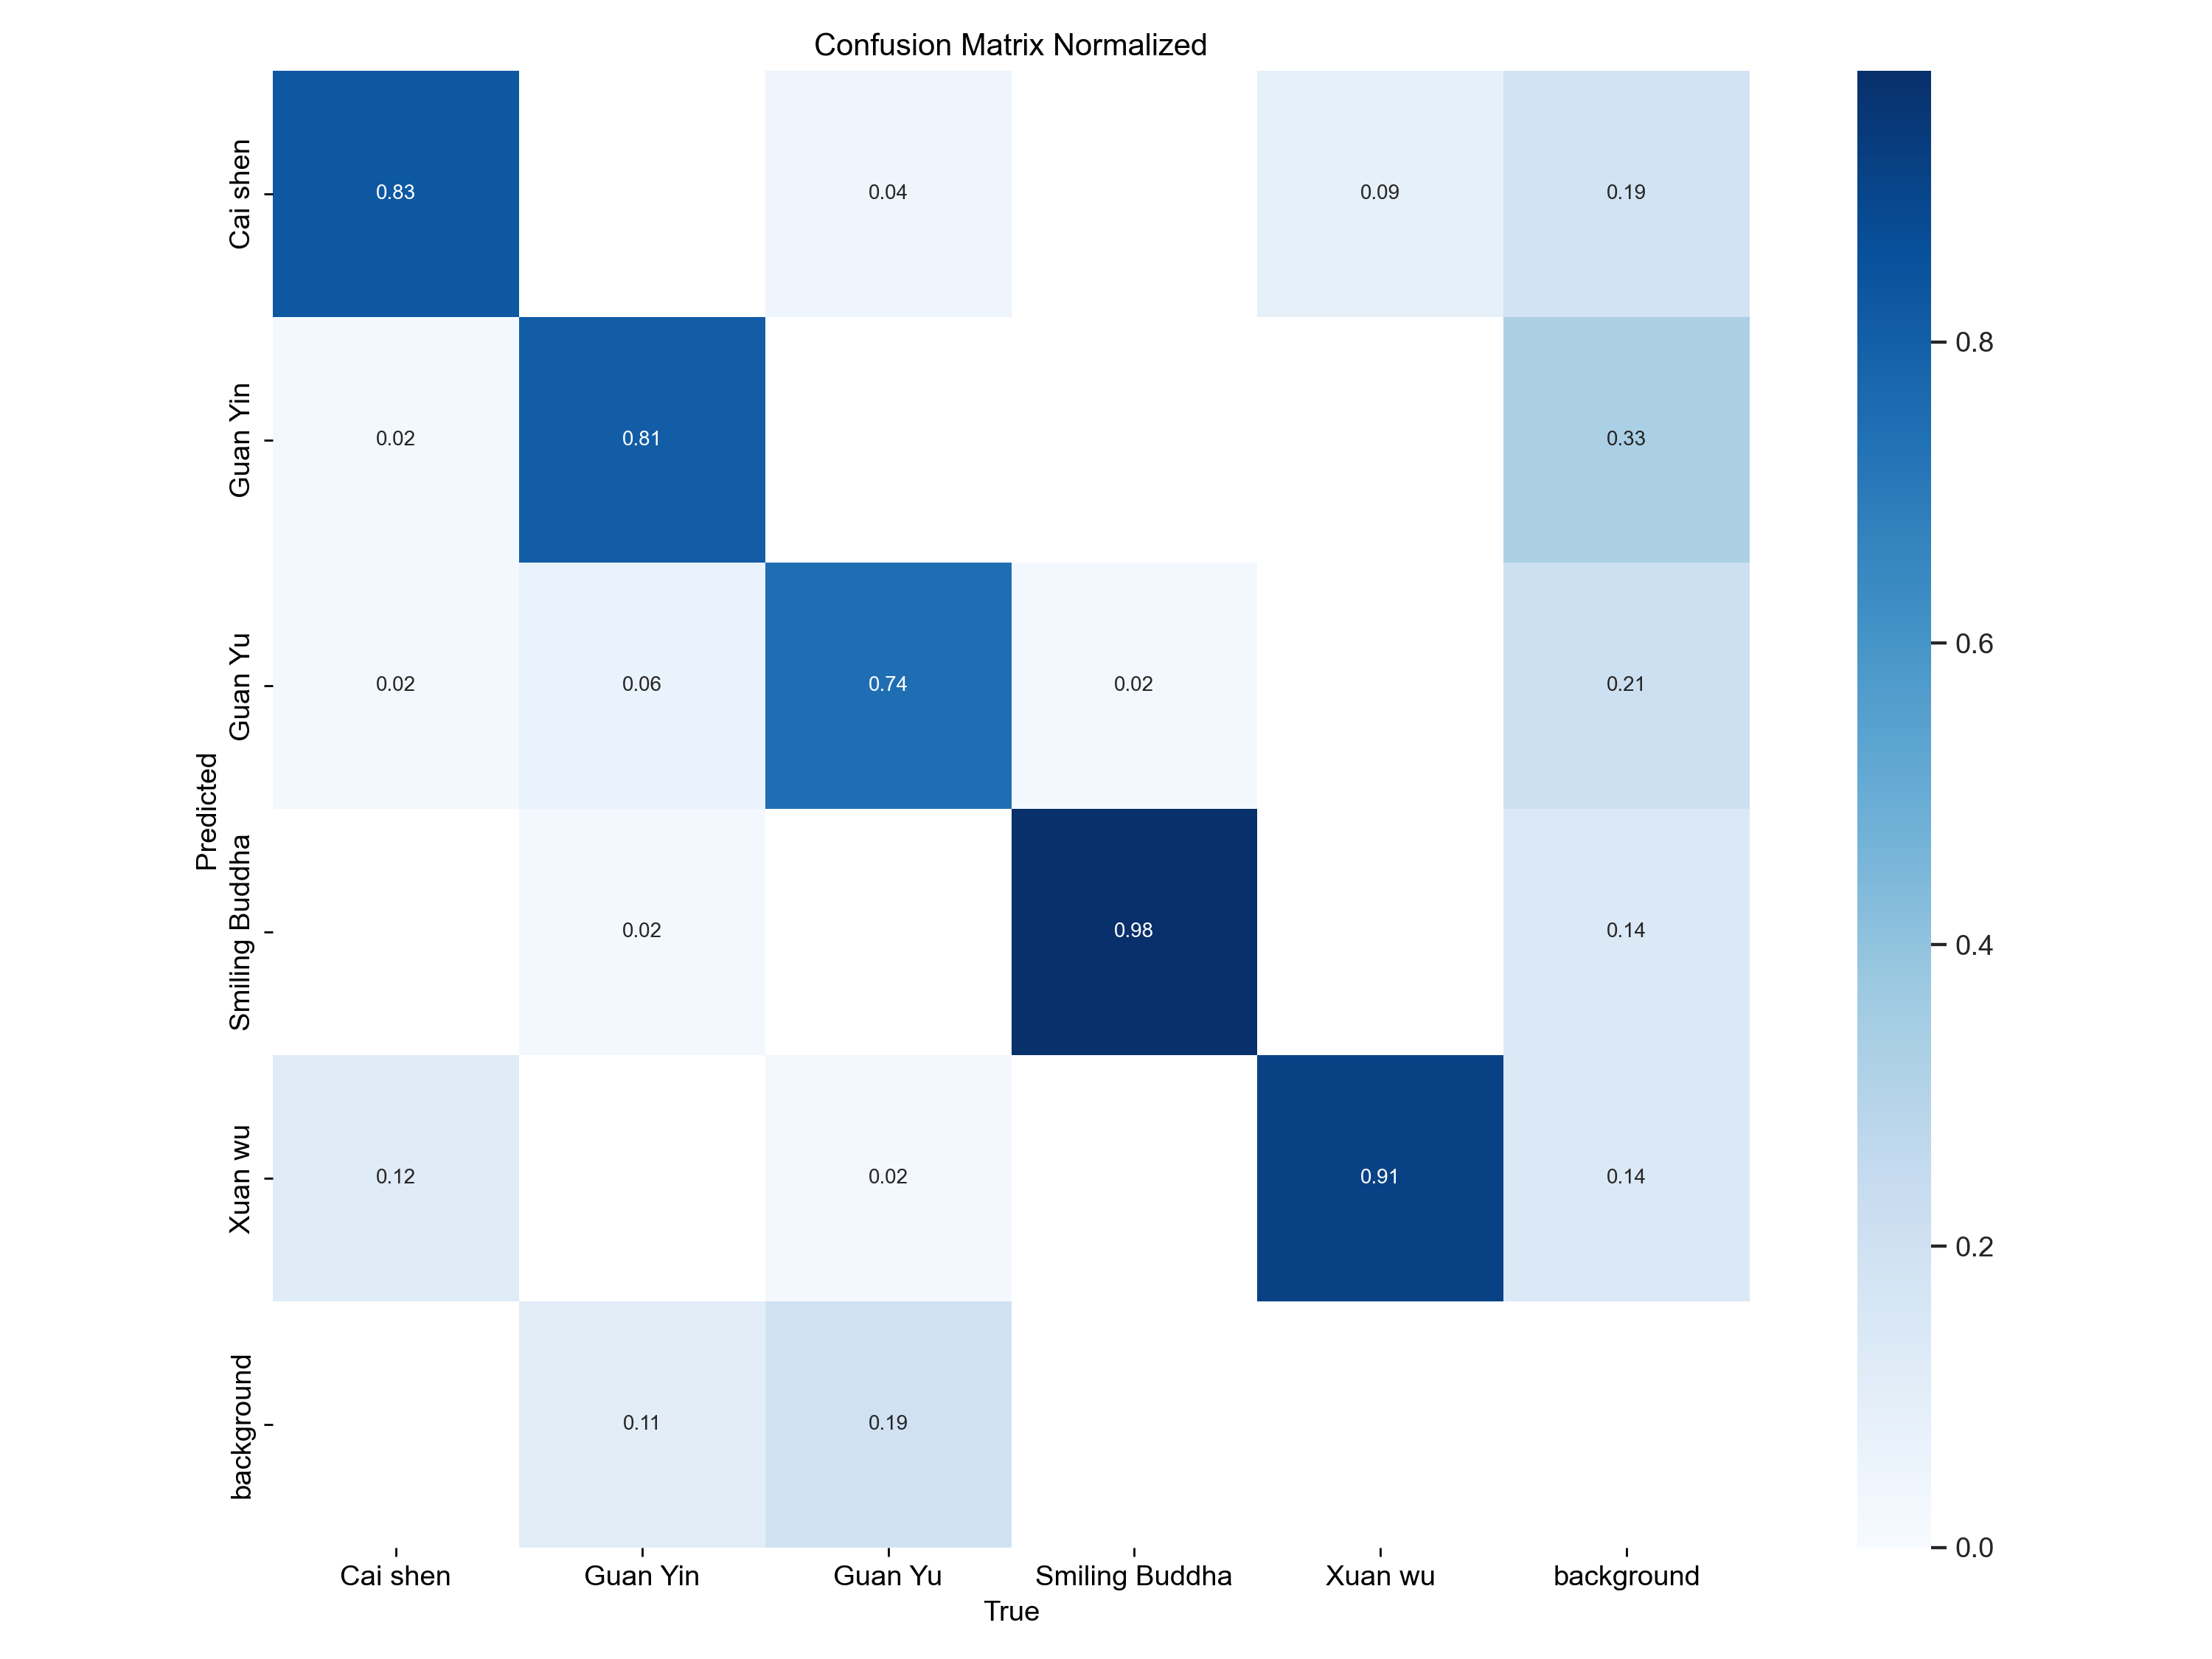

In [ ]:

# Recall: True Positive / (True Positive + False Negative)
# Higher recall means fewer missed detections.
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix_normalized.png', width=1000)

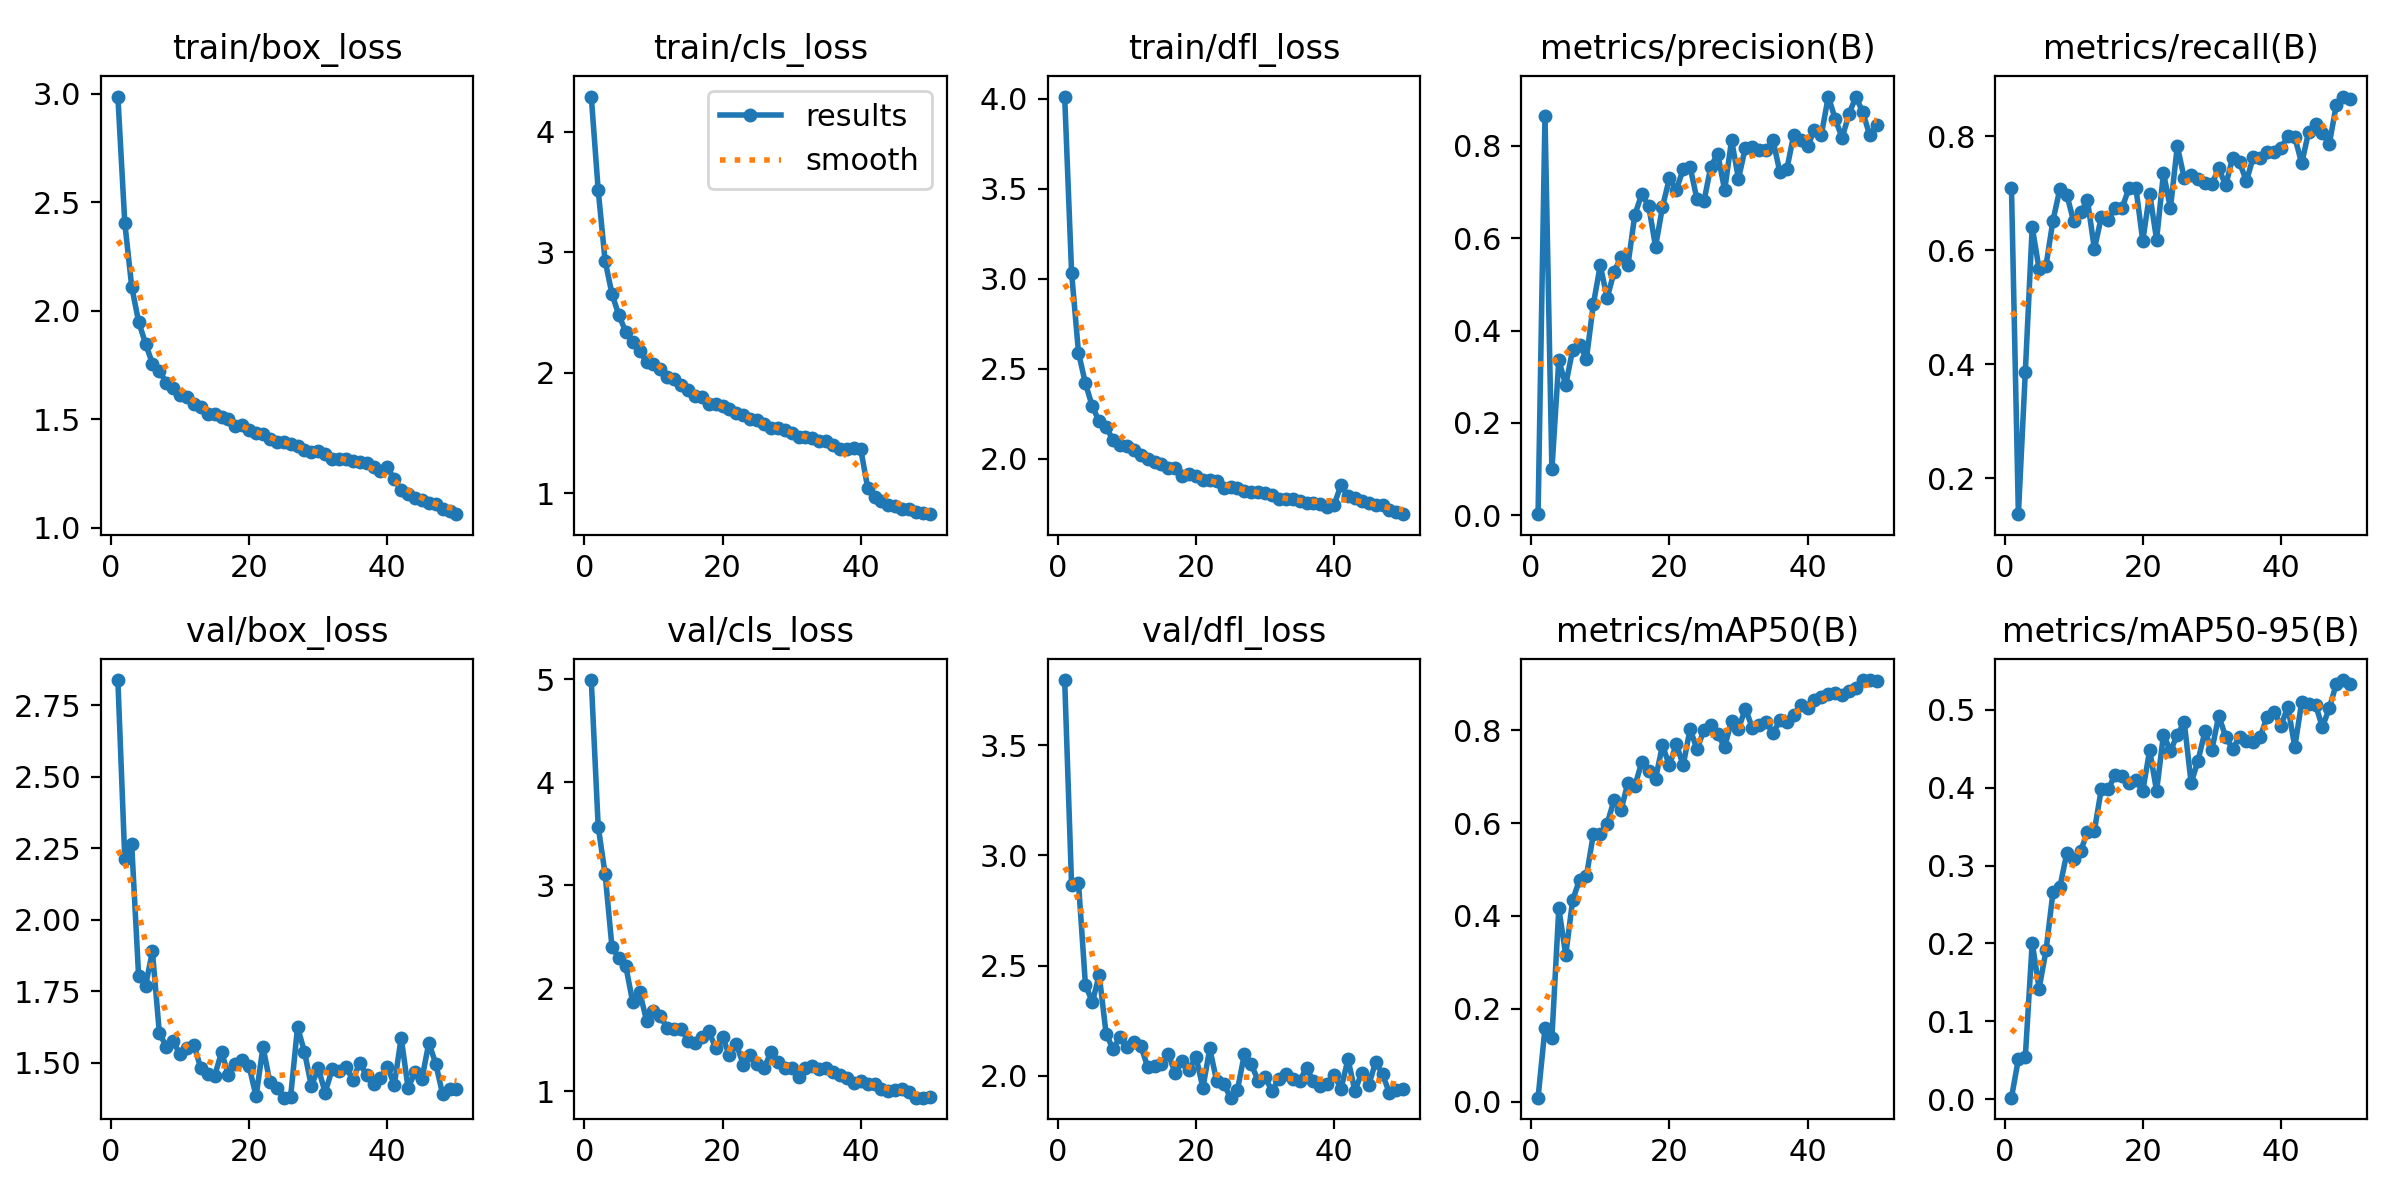

In [ ]:
# Display training batch visualization (what the model saw during training)
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=1000)

Precision = TP / (TP + FP)

Precision is simply true positives out of total detections.


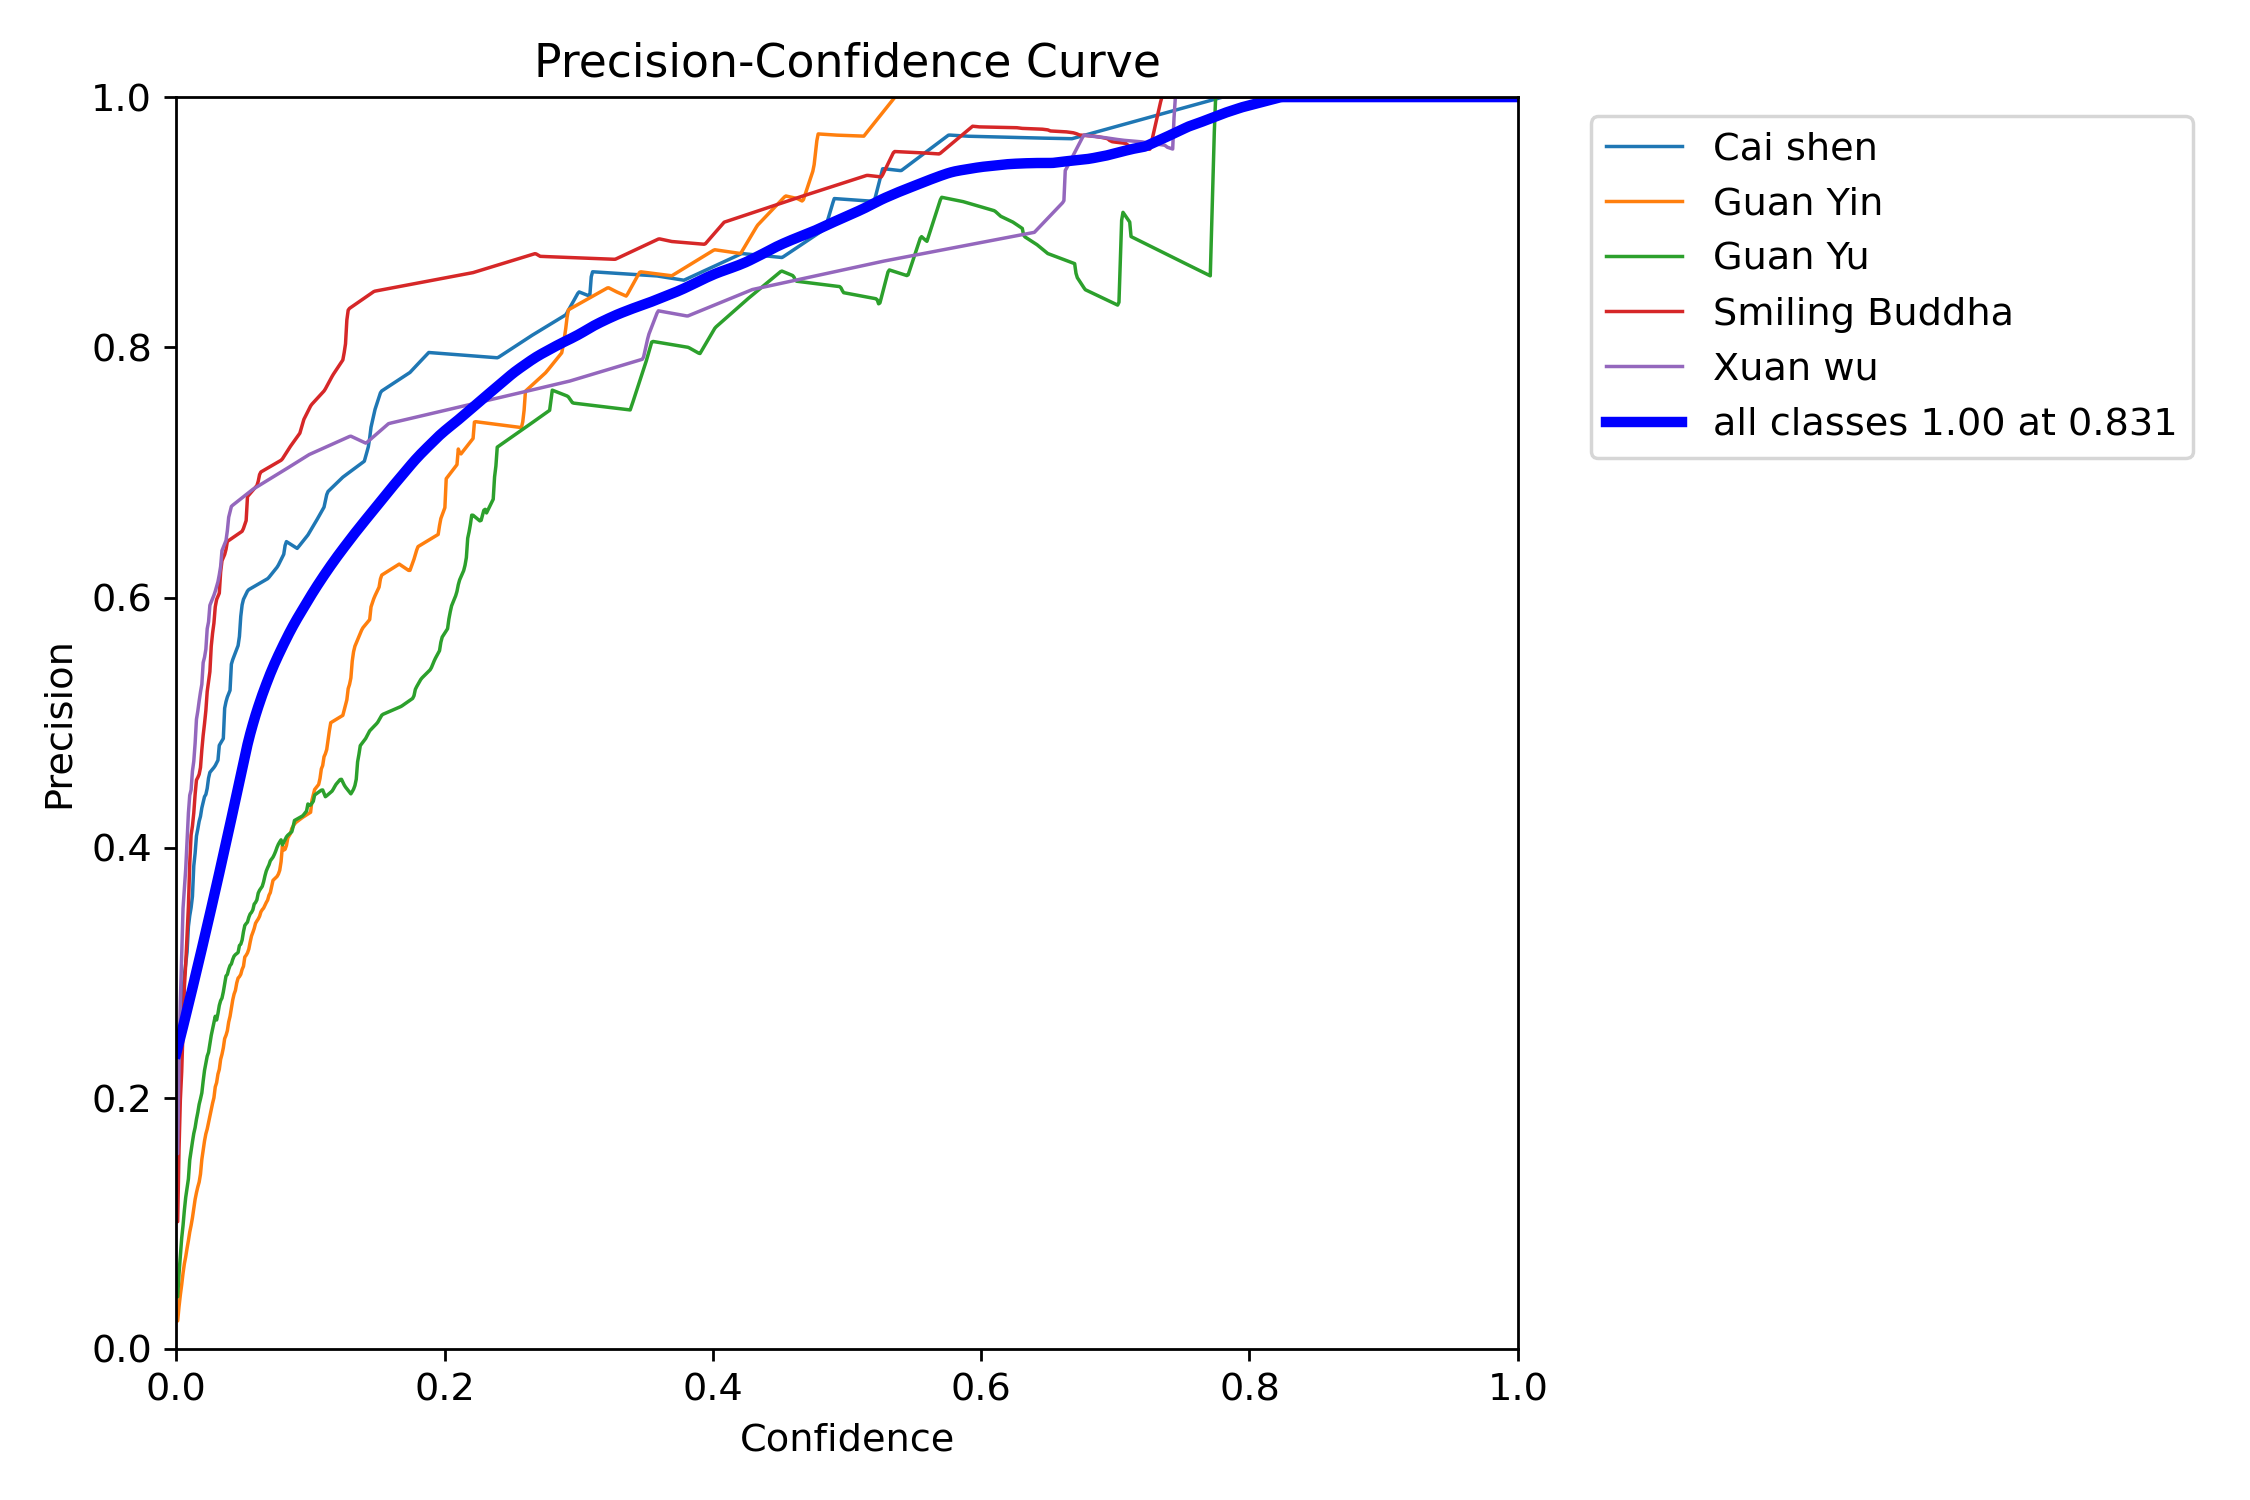

In [ ]:
# Display validation prediction results
Image(filename=f'{HOME}/runs/detect/train7/P_curve.png', width=1000)

Recall = TP / (TP + FN)

Recall is the True Positive out of all Ground Truths

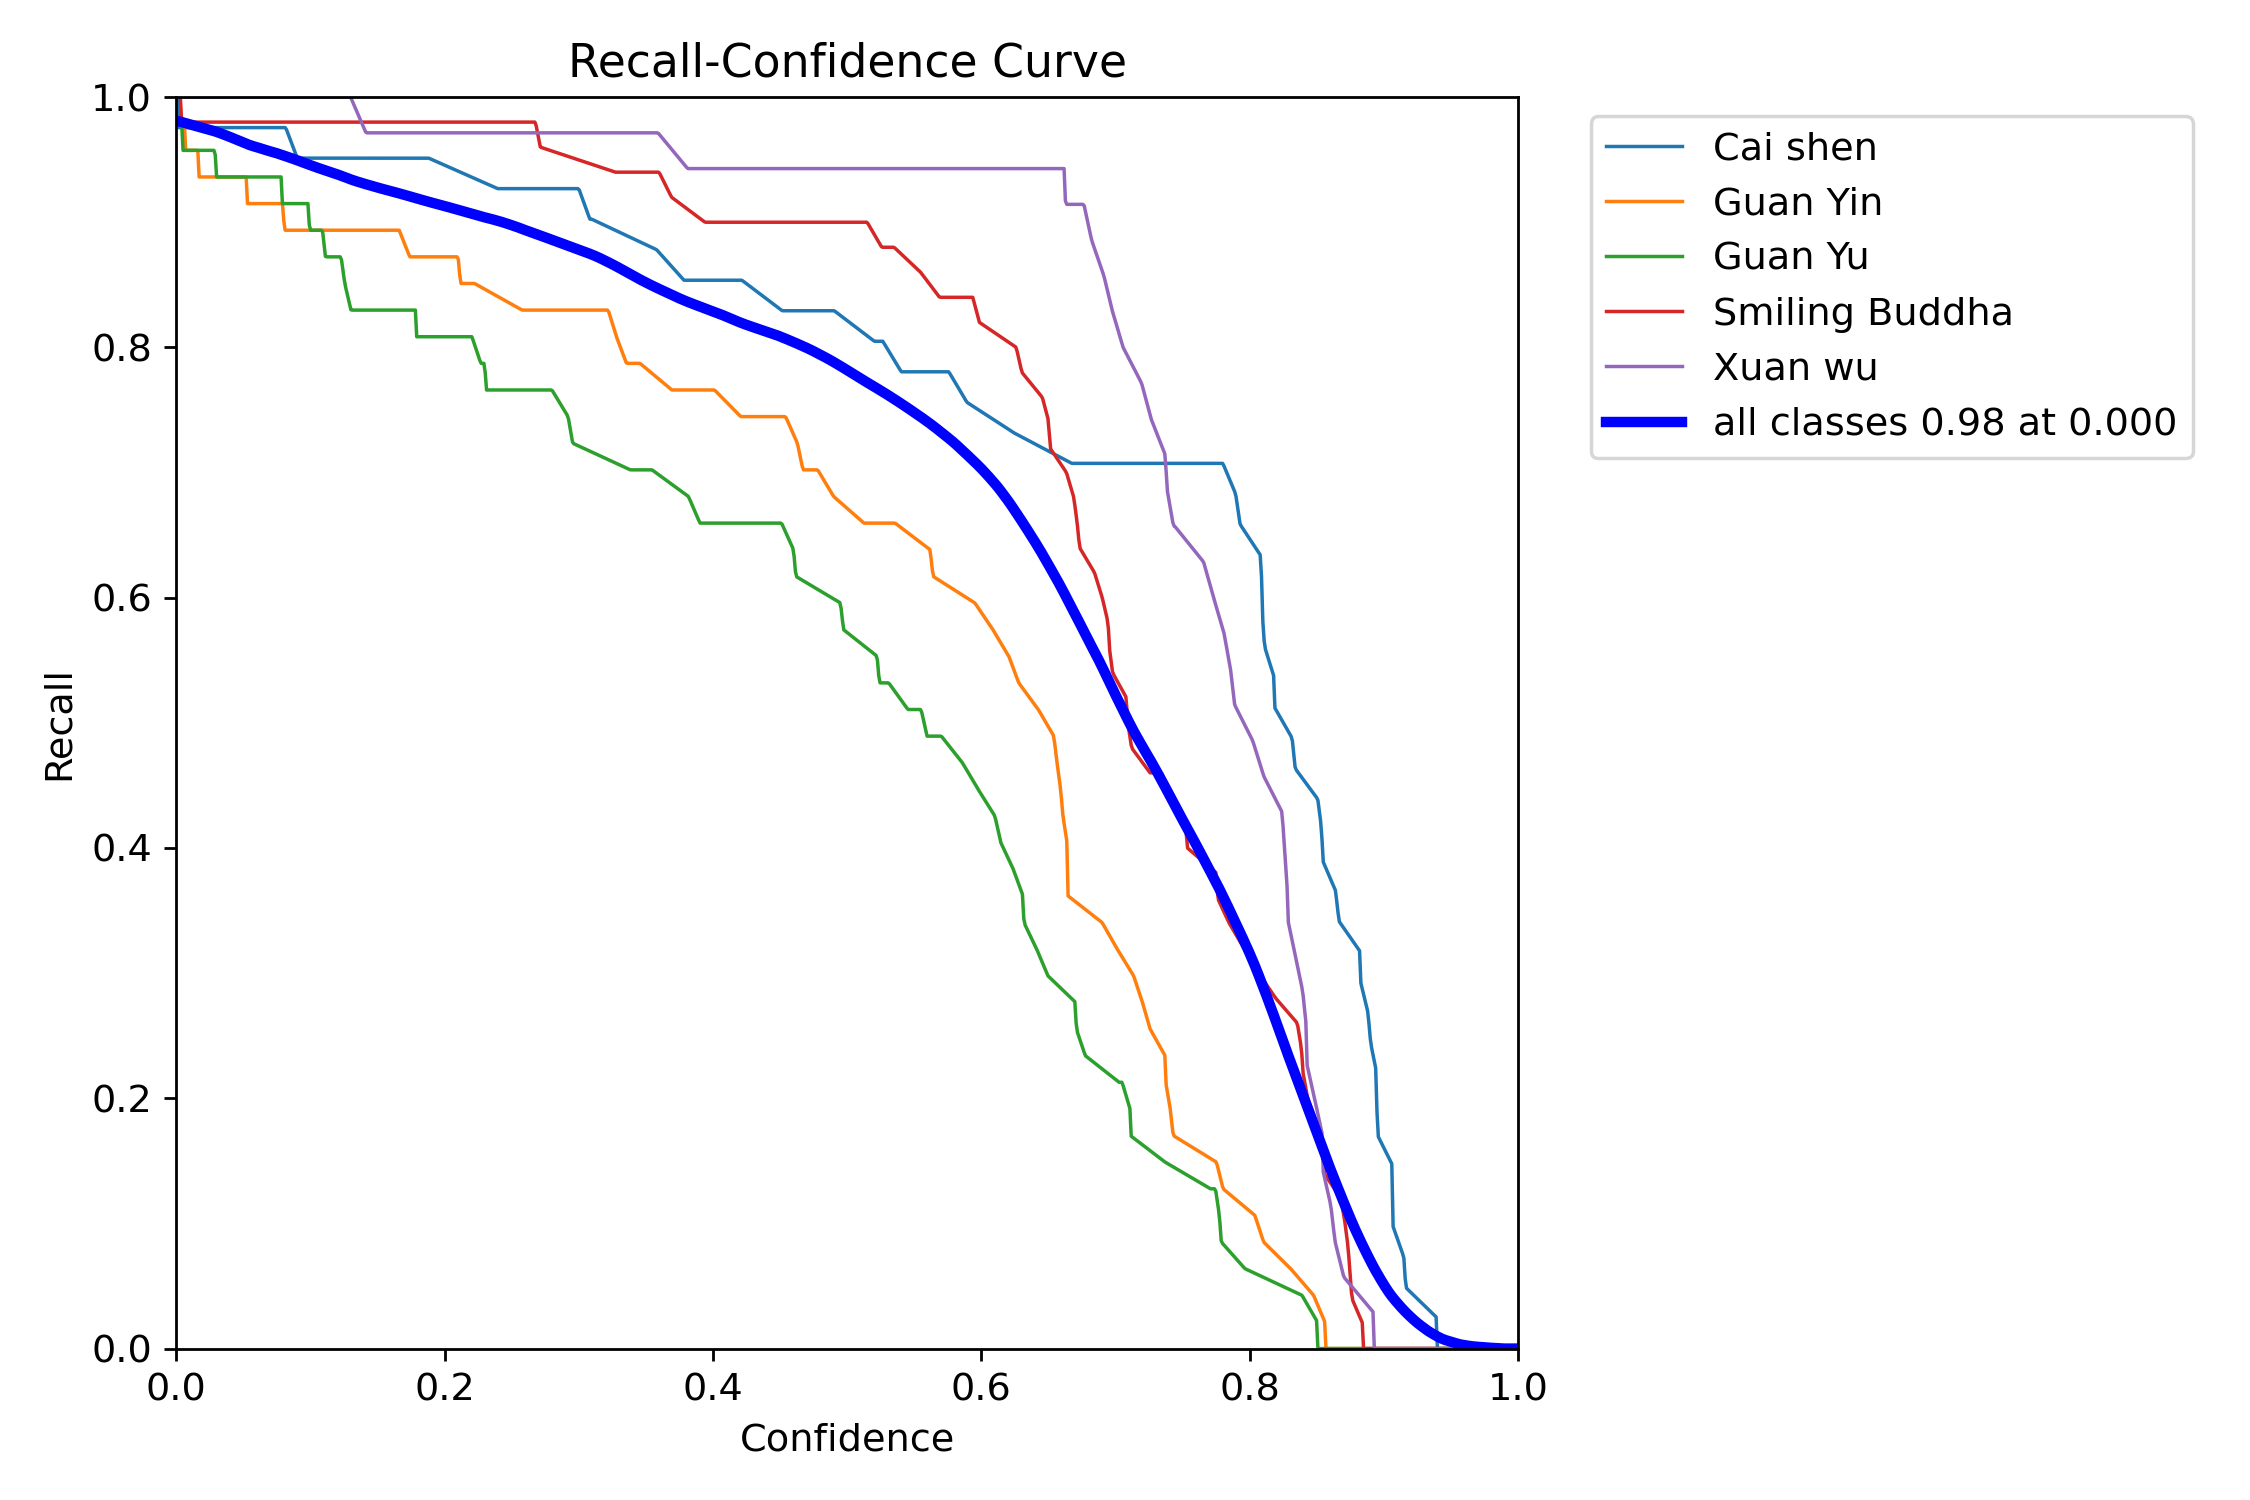

In [16]:
Image(filename=f'{HOME}/runs/detect/train7/R_curve.png', width=1000)

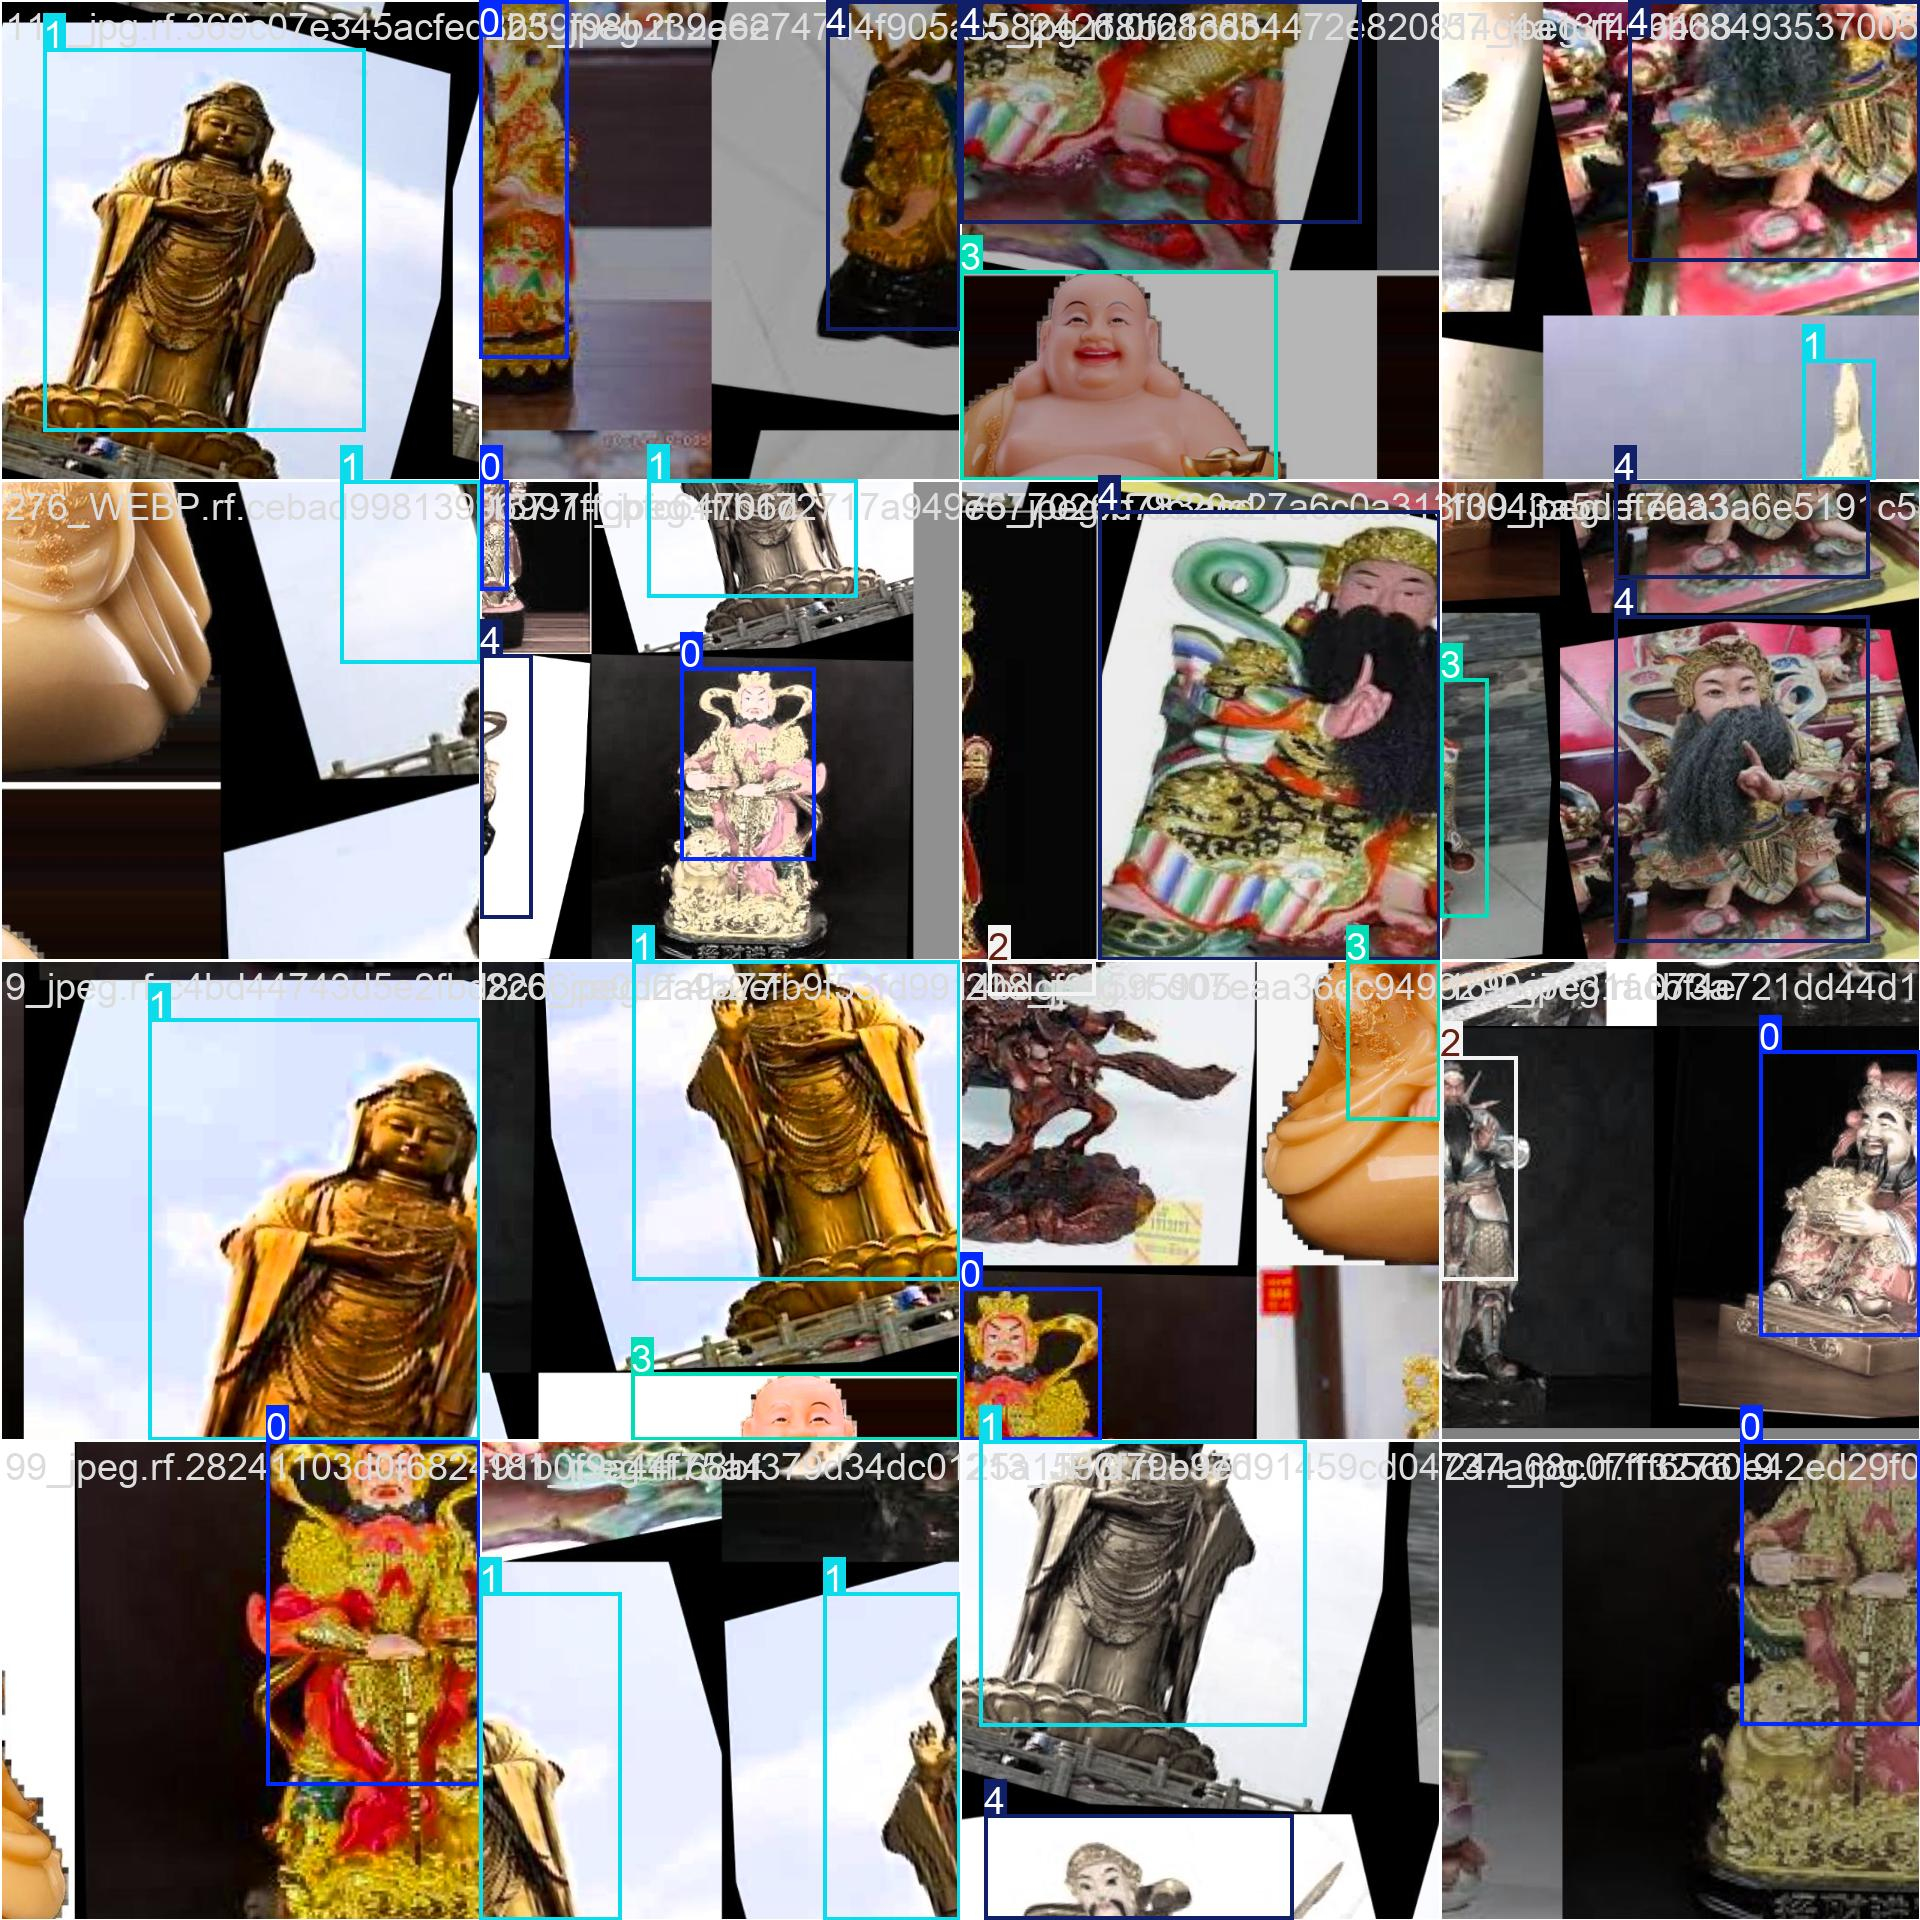

In [17]:
Image(filename=f'{HOME}/runs/detect/train7/train_batch0.jpg', width=1000)

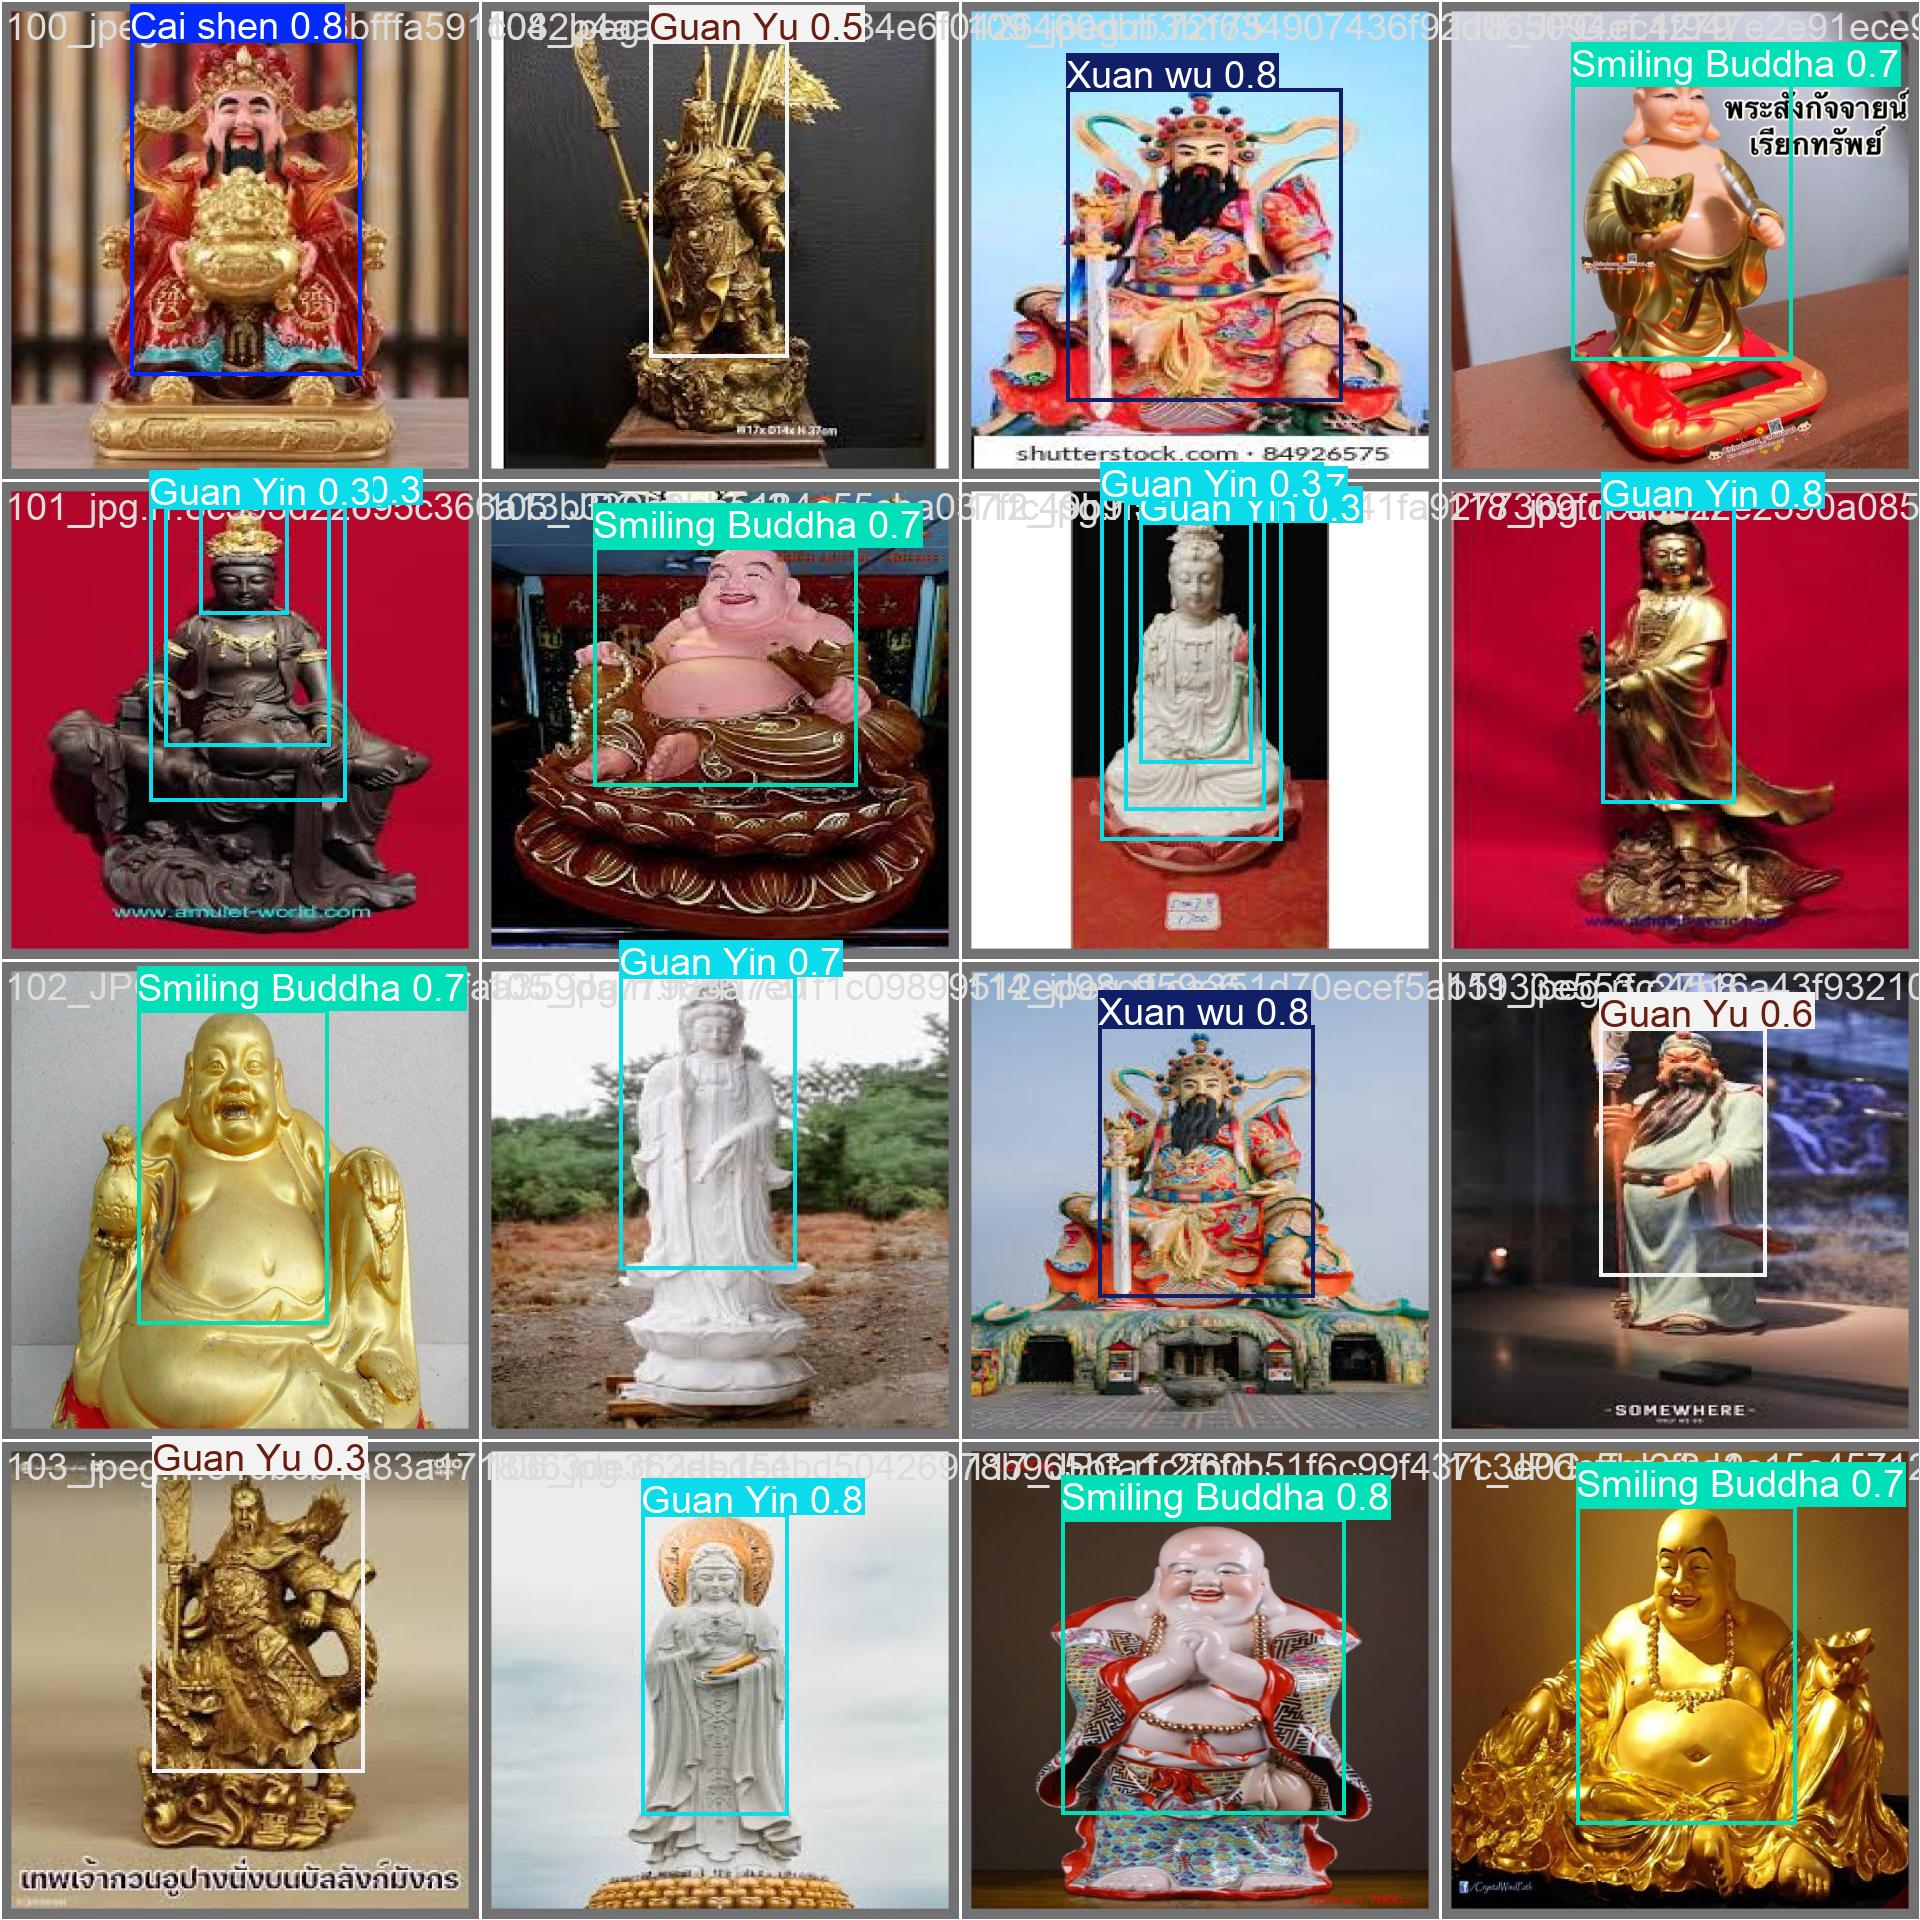

In [18]:
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=1000)

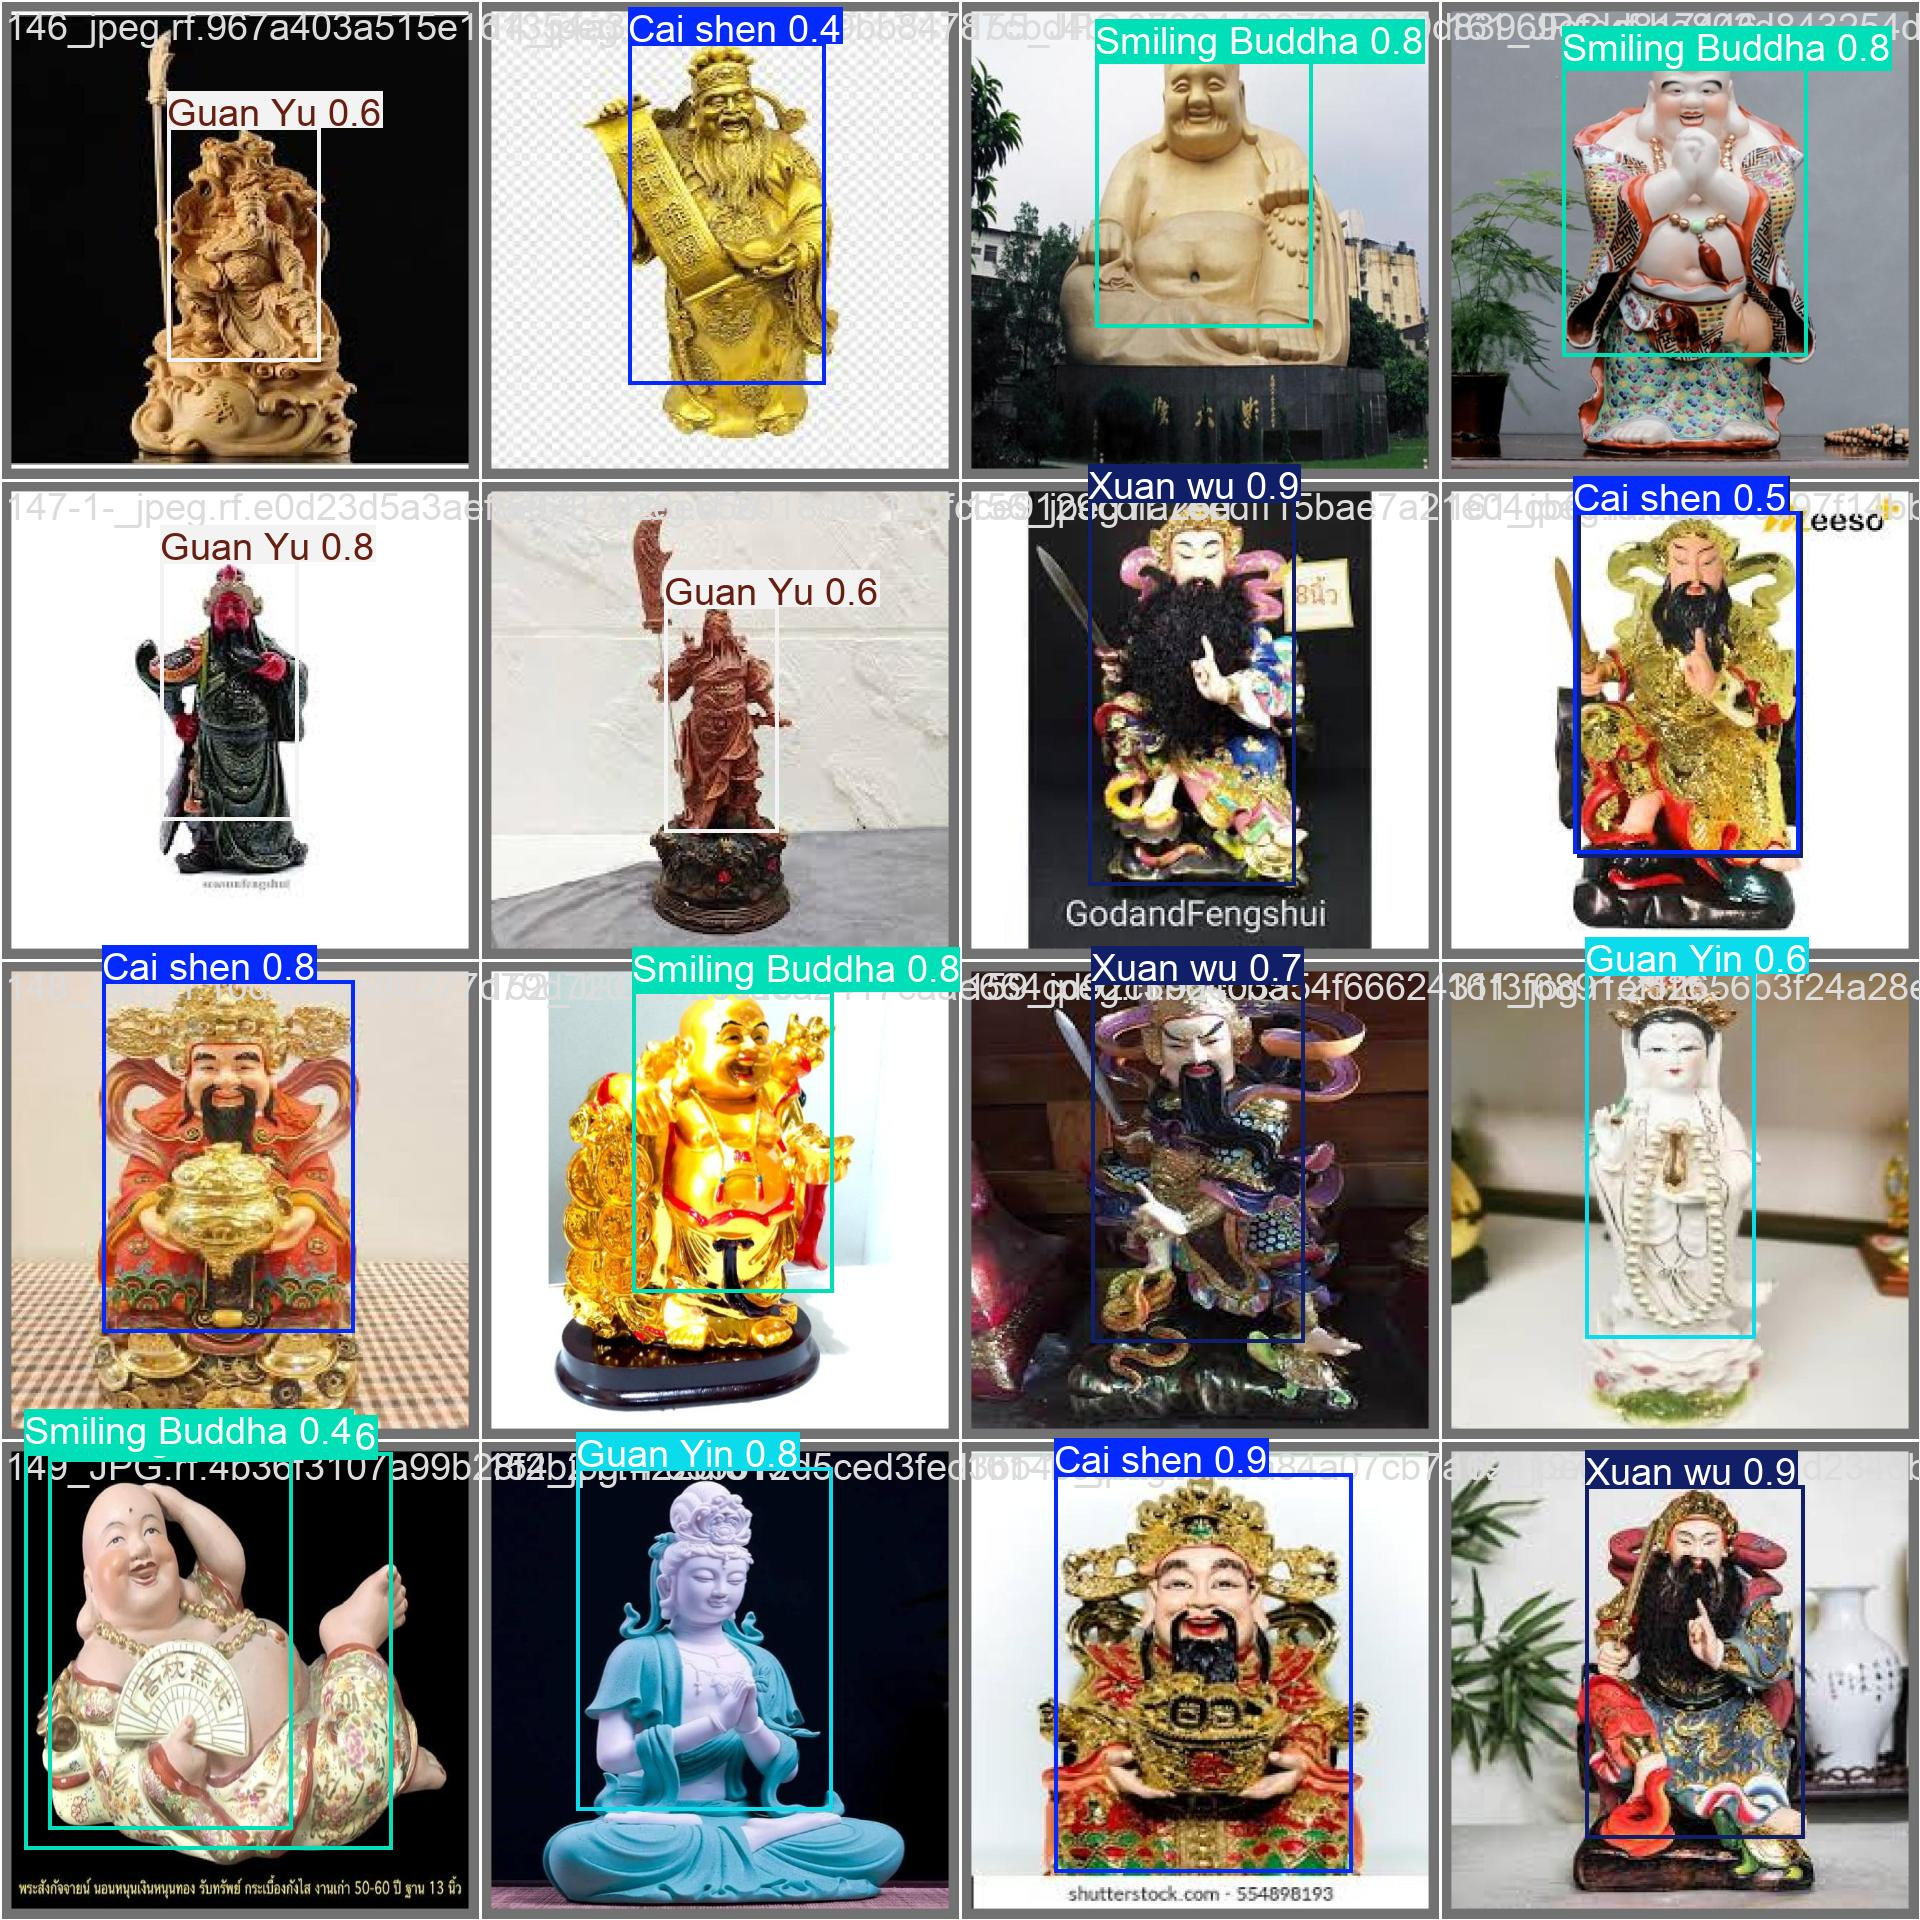

In [19]:
Image(filename=f'{HOME}/runs/detect/train7/val_batch1_pred.jpg', width=1000)

**Step # 06 Download the Model Weights from the Google Drive**

In [ ]:
!gdown "https://drive.google.com/uc?id=1ka7Gj8RE6iP8-ExtigZJhmiyr5k5lqRQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ka7Gj8RE6iP8-ExtigZJhmiyr5k5lqRQ&confirm=t
To: /content/best.pt
100% 18.9M/18.9M [00:00<00:00, 27.7MB/s]


**Step # 07  Validate Fine-Tuned Model**

In [ ]:
model = YOLO(r"C:\Users\Mon\Downloads\dataSci\runs\detect\train7\weights\best.pt")  # Load custom trained model weights

# Validate the model
metrics = model.val() # mean average precision at IoU thresholds 50-95
metrics.box.map  # map50-95
metrics.box.map50  # mean average precision at IoU 50%
metrics.box.map75  # mean average precision at IoU 75%
metrics.box.maps  # per-class mAP values

Ultralytics 8.3.111  Python-3.11.11 torch-2.6.0+cpu CPU (13th Gen Intel Core(TM) i5-13500)
YOLO12s summary (fused): 159 layers, 9,232,815 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access  (ping: 0.10.1 ms, read: 175.722.5 MB/s, size: 50.1 KB)


val: Scanning C:\Users\Mon\Downloads\dataSci\Chinese-God-2\valid\labels.cache... 220 images, 0 backgrounds, 0 corrupt: 100%|██████████| 220/220 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:26<00:00,  1.88s/it]


                   all        220        220      0.822       0.87      0.908      0.539
              Cai shen         41         41       0.86      0.897      0.946      0.704
              Guan Yin         47         47      0.847       0.83      0.877       0.47
               Guan Yu         47         47      0.752      0.711      0.783      0.379
        Smiling Buddha         50         50      0.871      0.942      0.958      0.492
               Xuan wu         35         35      0.782      0.971      0.975      0.649
Speed: 0.6ms preprocess, 113.5ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\val2


array([    0.70365,      0.4697,     0.37894,      0.4921,     0.64886])

**Step # 08 Inference with Custom Model on Images**

In [23]:
dataset.location

'c:\\Users\\Mon\\Downloads\\dataSci\\Chinese-God-2'

In [ ]:
# Perform prediction (inference) on a custom image and save results
results = model.predict(source = f"C:\Users\Mon\Downloads\dataSci\S__49020940.jpg", save = True)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1749333149.py, line 1)

In [ ]:
# Perform prediction (inference) on a custom image and save results
results = model.predict(source = r"C:\Users\Mon\Downloads\dataSci\5.jpg", save=True)



image 1/1 C:\Users\Mon\Downloads\dataSci\5.jpg: 640x640 2 Guan Yins, 114.9ms
Speed: 2.6ms preprocess, 114.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


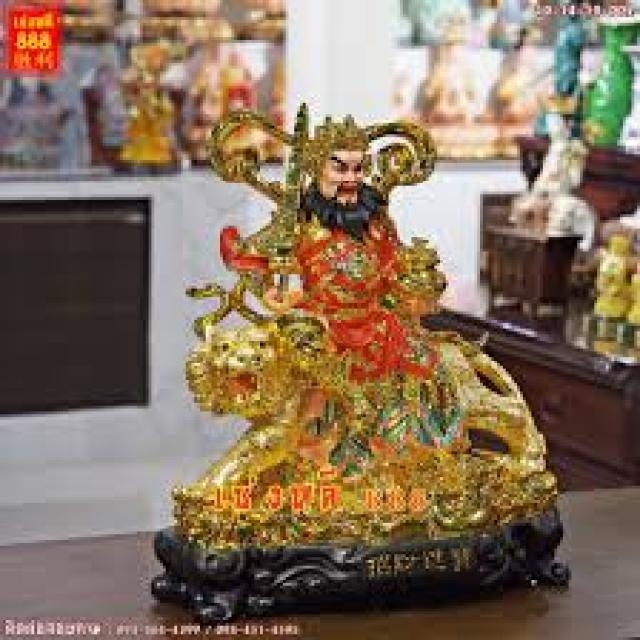

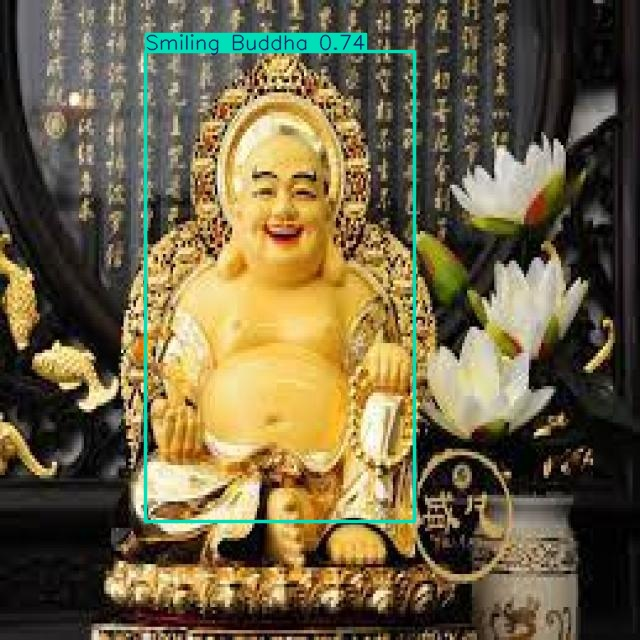

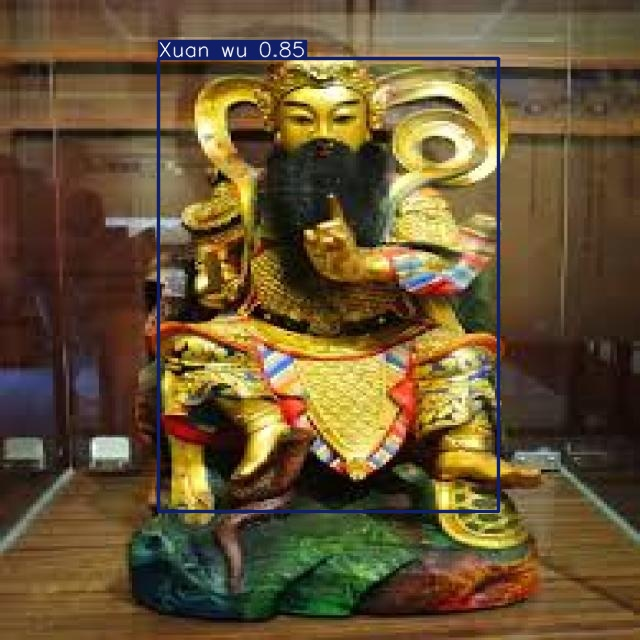

In [ ]:
# Display inference results (predicted bounding boxes) from saved outputs
import glob
import os
from IPython.display import Image as IPyImage, display
# Find latest prediction folder
latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
# Display few prediction images
for img in glob.glob(f'{latest_folder}/*.jpg')[2:5]:
    display(IPyImage(filename=img, width=600))
    print("\n")